# Inventory

- Reconstruct the US cattle herd head count from sub groups (calves, beef cows, milk cows, bulls, etc... ) to check numbers and understanding matches
- Also look into the calves / cattle on feed ratio
- Most inventory related data used to be annual and shifted to biannual

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import src

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import numpy as np

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
historical=True

## All Cattle

<AxesSubplot:>

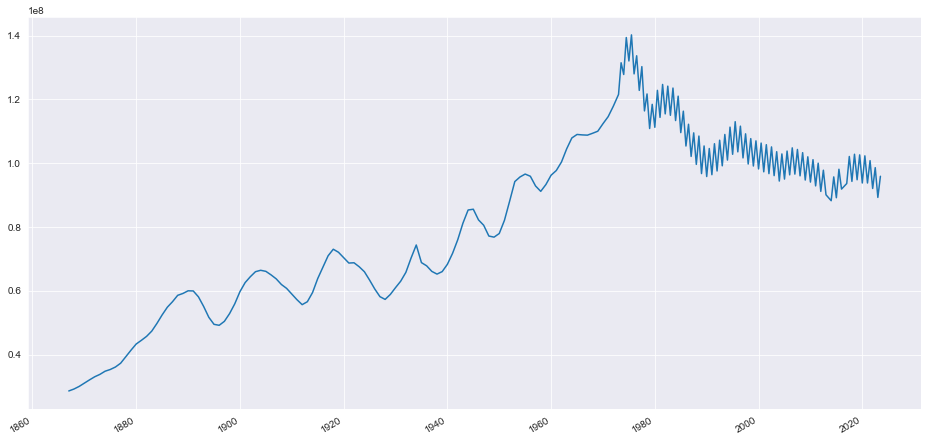

In [3]:
inv_incl_calves = pd.read_csv('../csv/inventory_incl_calves.csv')
inv_incl_calves = src.usda_clean_biannual(inv_incl_calves, historical=historical)

inv_incl_calves.plot()
# src.cubicspline(inv_incl_calves.resample('Y').mean()).plot()

## Calves

<AxesSubplot:>

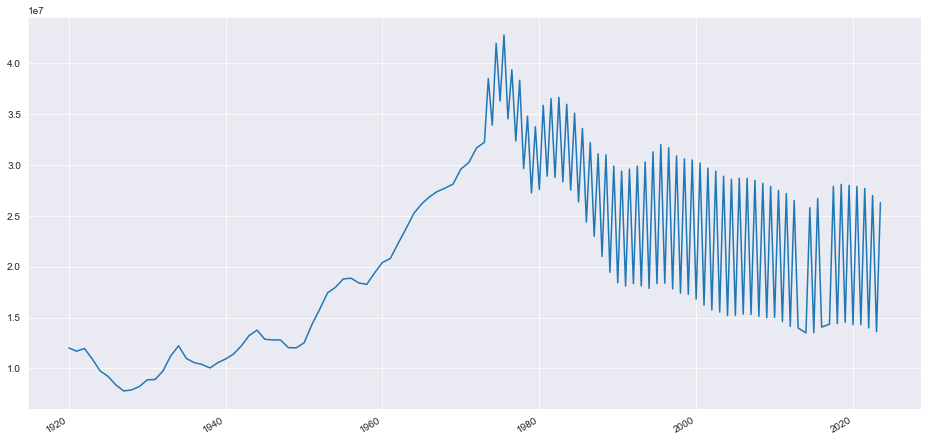

In [4]:
inventory_calves = pd.read_csv('../csv/inventory_calves.csv')
inventory_calves = src.usda_clean_biannual(inventory_calves, historical=historical)
inventory_calves.plot()
# src.cubicspline(inventory_calves.resample('Y').mean()).plot()

Text(0.5, 1.0, 'Calves as a percentage of total cattle inventory')

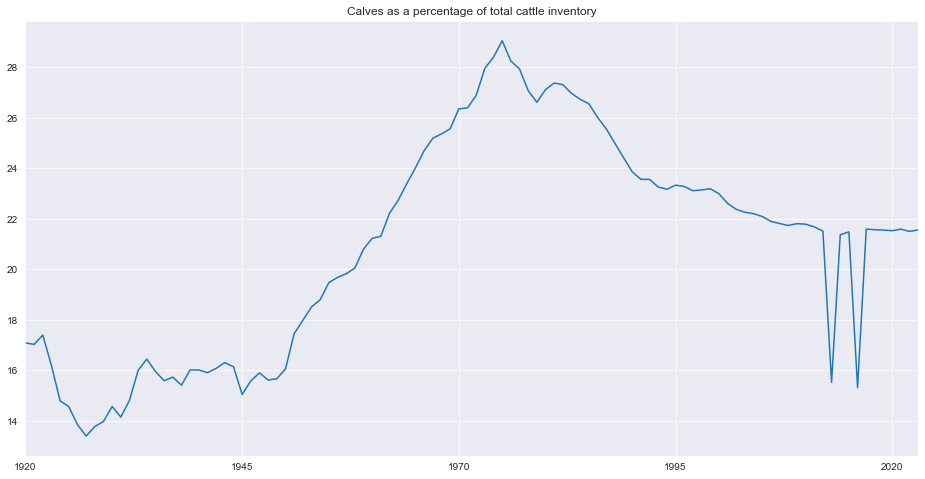

In [5]:
(100*inventory_calves.resample('Y').mean() / inv_incl_calves.resample('Y').mean()).dropna().plot()
plt.title('Calves as a percentage of total cattle inventory')

## Cows

### Beef

<AxesSubplot:>

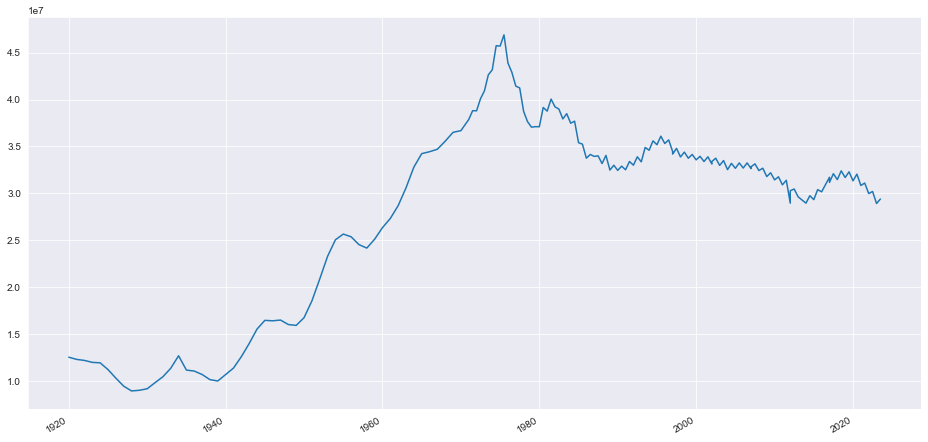

In [6]:
inventory_cows_beef = pd.read_csv('../csv/inventory_cows_beef.csv')
inventory_cows_beef = src.usda_clean_biannual(inventory_cows_beef, historical=historical)
inventory_cows_beef.plot()
# src.cubicspline(inventory_cows.resample('Y').mean()).plot()

### Milk

<AxesSubplot:>

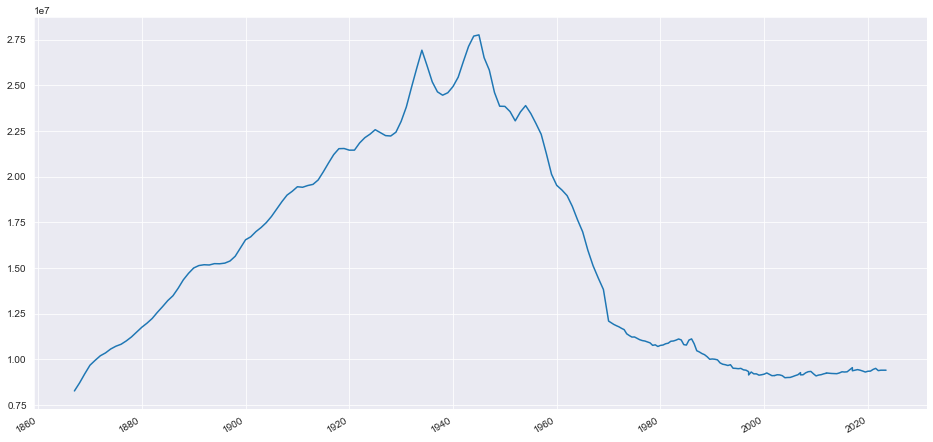

In [7]:
inventory_cows_milk = pd.read_csv('../csv/inventory_cows_milk.csv')
inventory_cows_milk = src.usda_clean_biannual(inventory_cows_milk, historical=historical)
inventory_cows_milk.plot()
# src.cubicspline(inventory_cows.resample('Y').mean()).plot()

<AxesSubplot:>

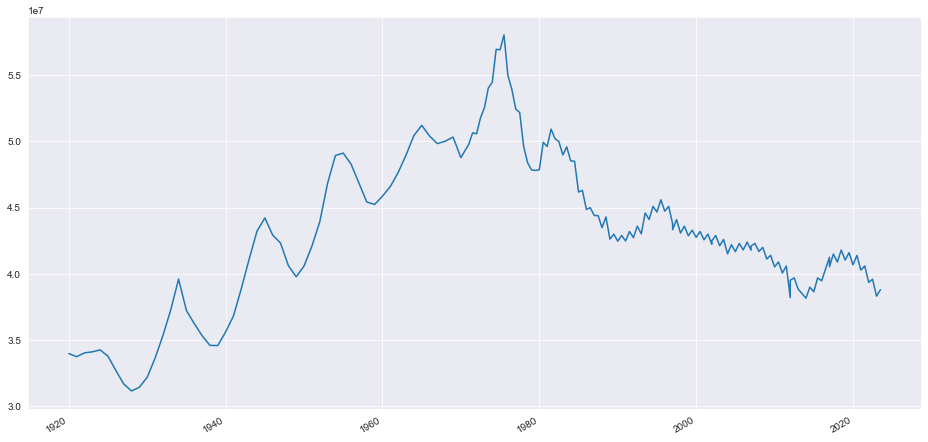

In [8]:
inventory_cows = pd.read_csv('../csv/inventory_cows.csv')
inventory_cows = src.usda_clean_biannual(inventory_cows, historical=historical)
inventory_cows.plot()
# src.cubicspline(inventory_cows.resample('Y').mean()).plot()

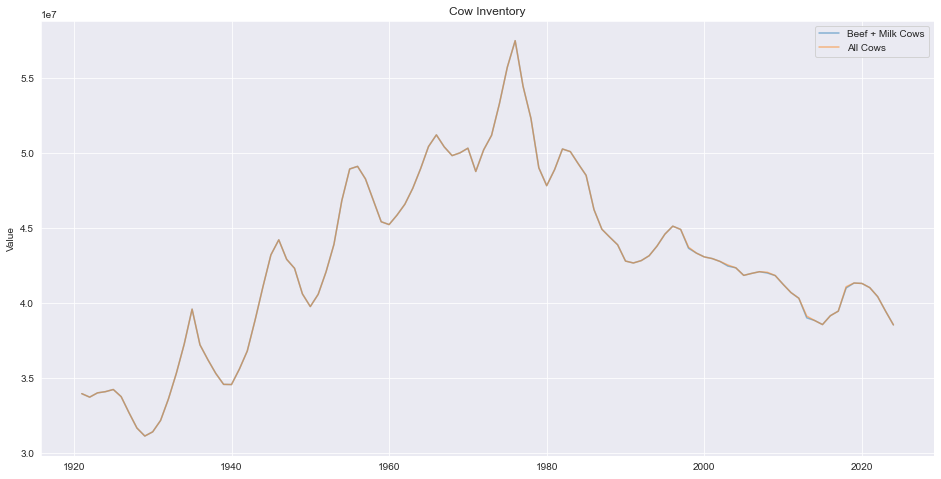

In [9]:
src.lineplot_mult_same_axis(
    (inventory_cows_beef + inventory_cows_milk).resample('Y').mean(),
    inventory_cows.resample('Y').mean(),
    'Beef + Milk Cows',
    'All Cows',
    title='Cow Inventory',
)

## Steers GE 500

<AxesSubplot:>

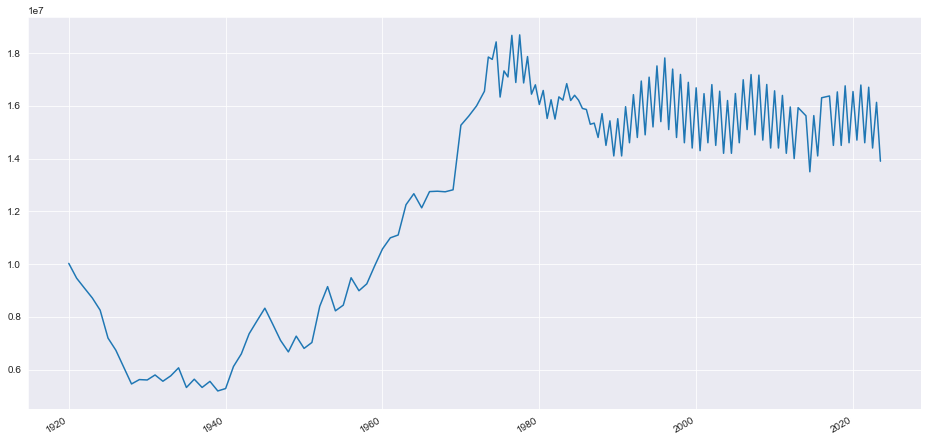

In [10]:
inventory_steers = pd.read_csv('../csv/inventory_steers_ge_500_biannual.csv')
inventory_steers = src.usda_clean_biannual(inventory_steers, historical=historical)
inventory_steers.plot()

## Heifers GE 500

<AxesSubplot:>

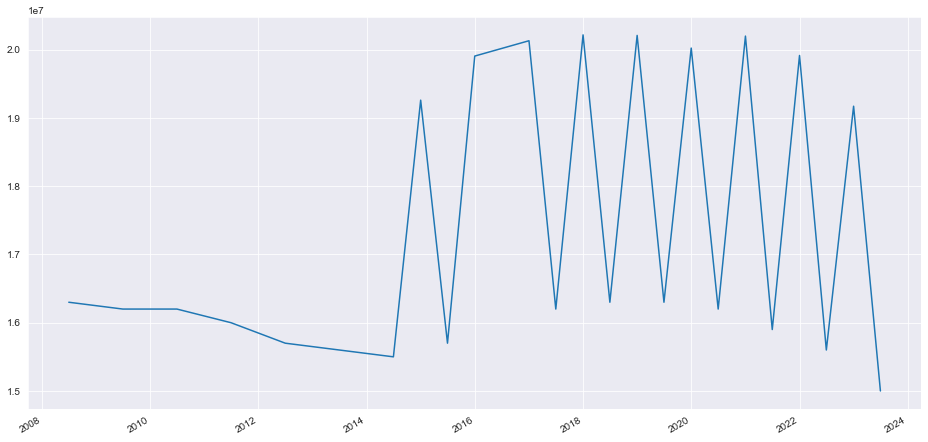

In [11]:
inventory_heifers = pd.read_csv('../csv/inventory_heifers_ge_500_biannual.csv')
inventory_heifers = src.usda_clean_biannual(inventory_heifers, historical=historical)
inventory_heifers.plot()

## Bulls GE 500

<AxesSubplot:>

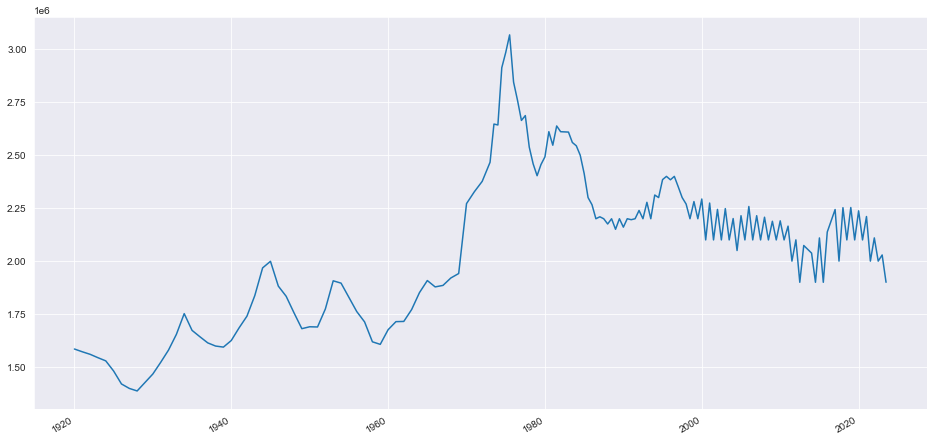

In [12]:
inventory_bulls = pd.read_csv('../csv/inventory_bulls_ge_500_biannual.csv')
inventory_bulls = src.usda_clean_biannual(inventory_bulls, historical=historical)
inventory_bulls.plot()

In [24]:
all_components = (inventory_calves[inventory_calves.index.year>=2014].resample('Y').mean() +
                  inventory_cows_beef[inventory_cows_beef.index.year>=2014].resample('Y').mean() +
                  inventory_cows_milk[inventory_cows_milk.index.year>=2014].resample('Y').mean() +
                  inventory_steers[inventory_steers.index.year>=2014].resample('Y').mean() +
                  inventory_heifers[inventory_heifers.index.year>=2014].resample('Y').mean() +
                  inventory_bulls[inventory_bulls.index.year>=2014].resample('Y').mean())

<AxesSubplot:>

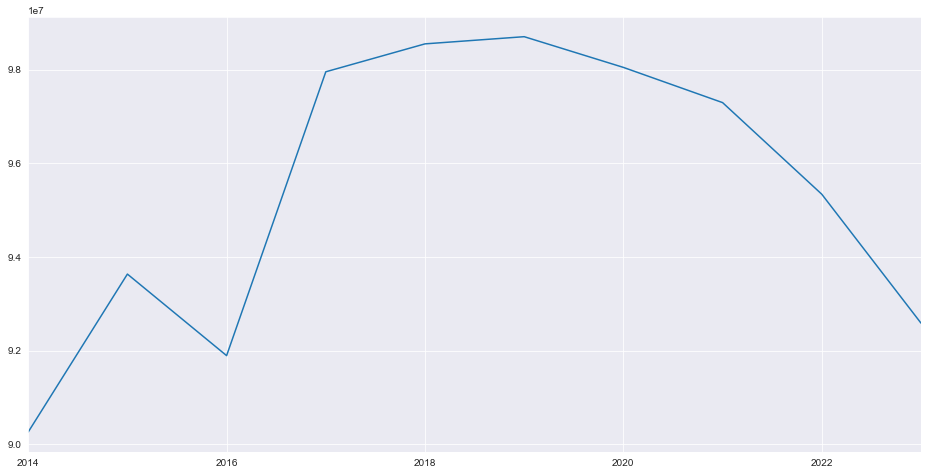

In [25]:
all_components.plot()

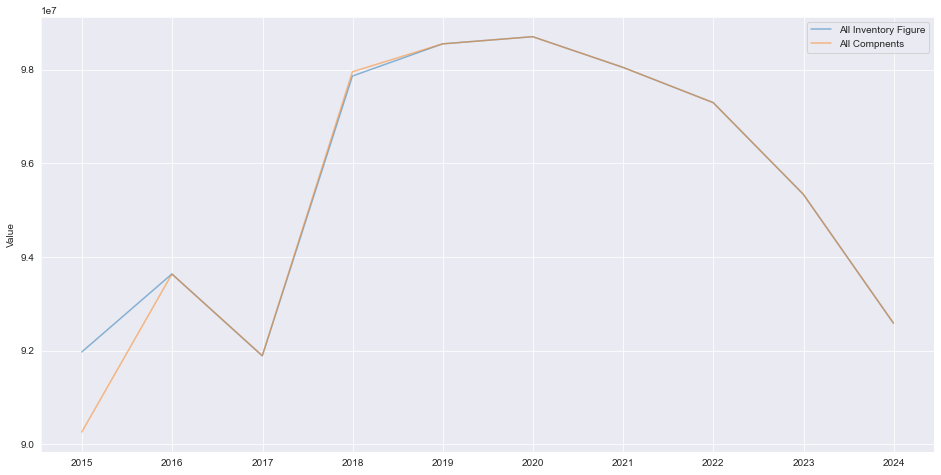

In [26]:
src.lineplot_mult_same_axis(
    inv_incl_calves[inv_incl_calves.index.year>=2014].resample('Y').mean(),
    all_components,
    'All Inventory Figure',
    'All Compnents'
)

- Was able to successfully replicate the reported total inventory of cattle by summing up the components

## All Cattle Components

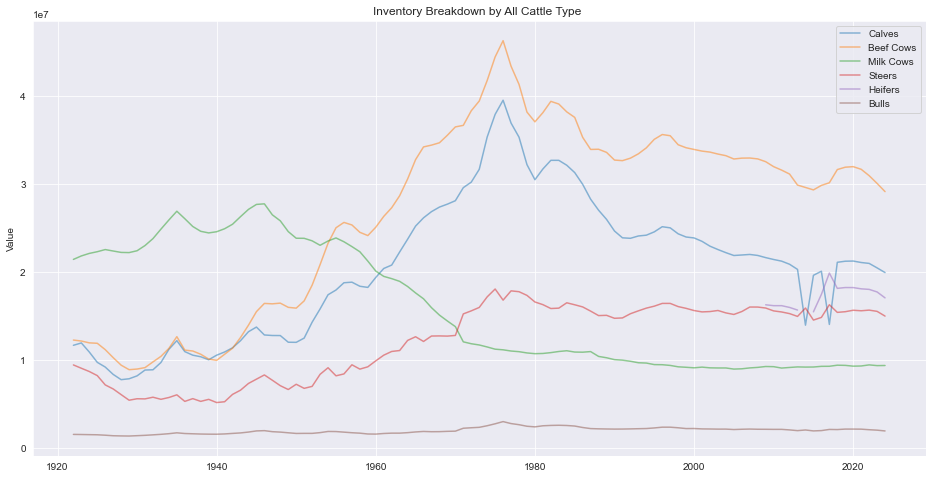

In [27]:

src.lineplot_mult_same_axis(
    inventory_calves[inventory_calves.index.year>1920].resample('Y').mean(),
    inventory_cows_beef[inventory_cows_beef.index.year>1920].resample('Y').mean(),
    inventory_cows_milk[inventory_cows_milk.index.year>1920].resample('Y').mean(),
    inventory_steers[inventory_steers.index.year>1920].resample('Y').mean(),
    inventory_heifers[inventory_heifers.index.year>1920].resample('Y').mean(),
    inventory_bulls[inventory_bulls.index.year>1920].resample('Y').mean(),
    'Calves',
    'Beef Cows',
    'Milk Cows',
    'Steers',
    'Heifers',
    'Bulls',
    title='Inventory Breakdown by All Cattle Type ',
)


In [18]:
print('Latest Breakdown\n')
print(f'{"Inventory":<20} {"Count":<15} {"Percentage":<10}')
print(f'{"-"*20:<20} {"-"*15:<15} {"-"*10:<10}')
print(f'{"Calves":<20} {int(inventory_calves[-1]):<15,} {inventory_calves[-1]*100/inv_incl_calves[-1]:<10.2f}%')
print(f'{"Cows (beef)":<20} {int(inventory_cows_beef[-1]):<15,} {inventory_cows_beef[-1]*100/inv_incl_calves[-1]:<10.2f}%')
print(f'{"Cows (milk)":<20} {int(inventory_cows_milk[-1]):<15,} {inventory_cows_milk[-1]*100/inv_incl_calves[-1]:<10.2f}%')
print(f'{"Steers":<20} {int(inventory_steers[-1]):<15,} {inventory_steers[-1]*100/inv_incl_calves[-1]:<10.2f}%')
print(f'{"Heifers":<20} {int(inventory_heifers[-1]):<15,} {inventory_heifers[-1]*100/inv_incl_calves[-1]:<10.2f}%')
print(f'{"Bulls":<20} {int(inventory_bulls[-1]):<15,} {inventory_bulls[-1]*100/inv_incl_calves[-1]:<10.2f}%')

Latest Breakdown

Inventory            Count           Percentage
-------------------- --------------- ----------
Calves               26,300,000      27.42     %
Cows (beef)          29,400,000      30.66     %
Cows (milk)          9,400,000       9.80      %
Steers               13,900,000      14.49     %
Heifers              15,000,000      15.64     %
Bulls                1,900,000       1.98      %


## On Feed

<AxesSubplot:>

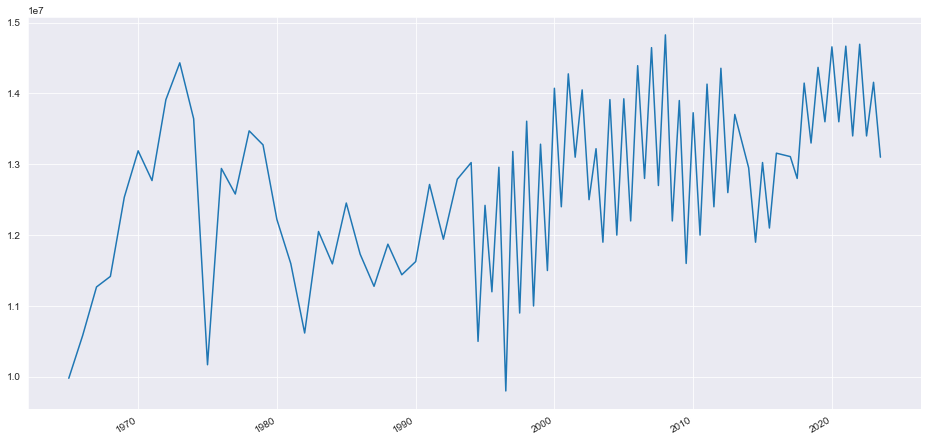

In [19]:
on_feed = pd.read_csv('../csv/inventory_on_feed_biannual.csv')
on_feed = src.usda_clean_biannual(on_feed, historical=historical)
on_feed.plot()

# Calves to On Feed Ratio

In [20]:
calve_to_on_feed_ratio_annual = inventory_calves.resample('Y').mean() /  on_feed.resample('Y').mean()
calve_to_on_feed_ratio_annual = calve_to_on_feed_ratio_annual.dropna()

Text(0.5, 1.0, 'Calves to On Feed Ratio')

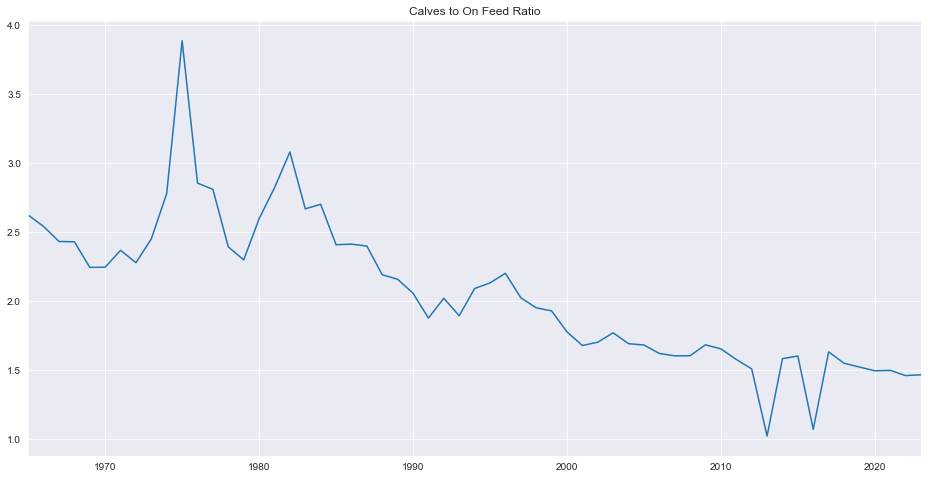

In [21]:
calve_to_on_feed_ratio_annual.plot()

plt.title('Calves to On Feed Ratio')

<AxesSubplot:>

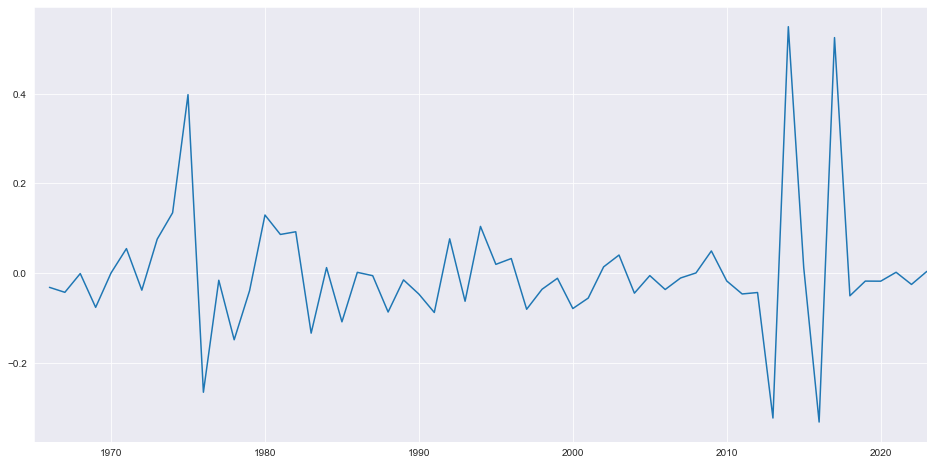

In [22]:
calve_to_on_feed_ratio_annual_pct_chg = calve_to_on_feed_ratio_annual.pct_change()
calve_to_on_feed_ratio_annual_pct_chg.plot()

<AxesSubplot:>

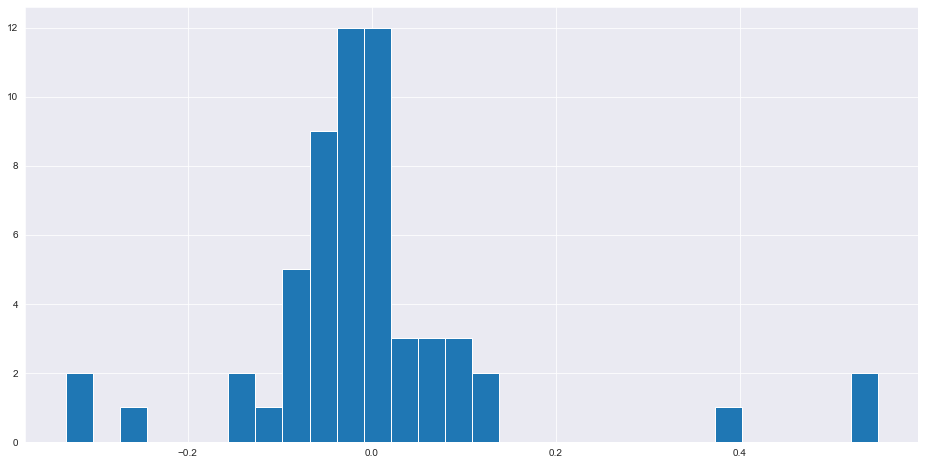

In [23]:
calve_to_on_feed_ratio_annual_pct_chg.hist(bins=30)